In [1]:
import os
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout ,BatchNormalization, LayerNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("Tweets.csv")

In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [4]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
data['text'] = data['text'].fillna('') 
X = data['text']
Y = data['sentiment']
X = X.apply(clean_text)

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)  
X_vect = vectorizer.fit_transform(X)

In [6]:
#For ML Models
X_train_ML, X_test_ML, y_train_ML, y_test_ML = train_test_split(X_vect, Y, test_size=0.2, random_state=42)

In [8]:
svm_model = SVC()
rf_model = RandomForestClassifier(n_estimators=100,n_jobs=-1,min_samples_split=5, random_state=42)
nb_model = MultinomialNB()

In [9]:
svm_model.fit(X_train_ML, y_train_ML)
svm_predictions = svm_model.predict(X_test_ML)
svm_accuracy = accuracy_score(y_test_ML, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6916499909041295


In [10]:
rf_model.fit(X_train_ML, y_train_ML)
rf_predictions = rf_model.predict(X_test_ML)
rf_accuracy = accuracy_score(y_test_ML, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.686556303438239


In [11]:
nb_model.fit(X_train_ML, y_train_ML)
nb_predictions = nb_model.predict(X_test_ML)
nb_accuracy = accuracy_score(y_test_ML, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.639439694378752


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

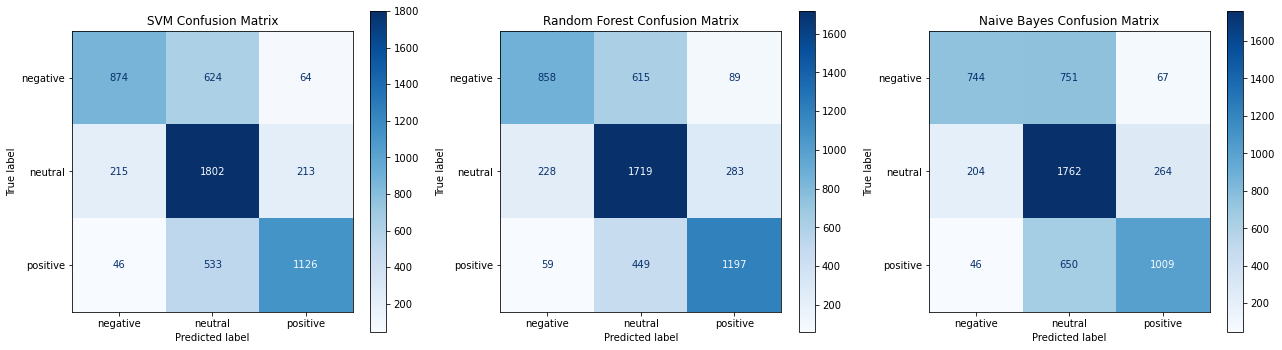

In [13]:
models = {'SVM': svm_predictions, 'Random Forest': rf_predictions, 'Naive Bayes': nb_predictions}
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, predictions) in enumerate(models.items()):
    cm = confusion_matrix(y_test_ML, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_ML))
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

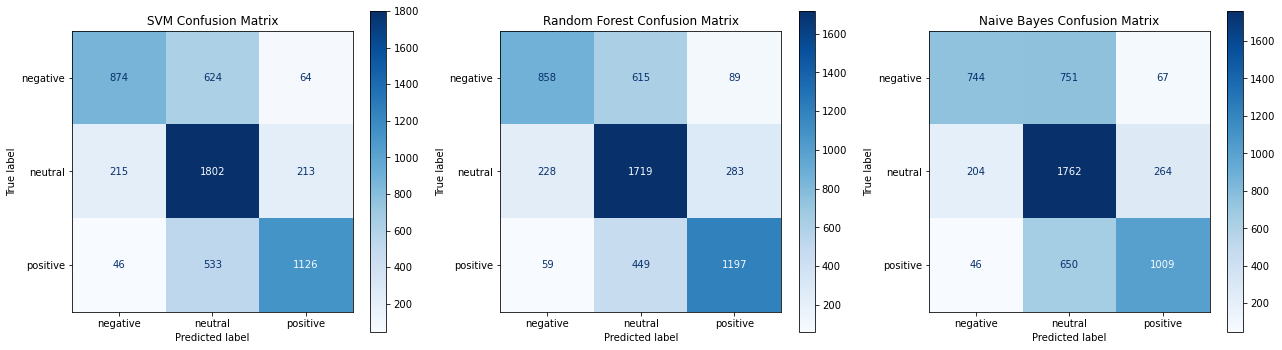

In [14]:
models = {'SVM': svm_predictions, 'Random Forest': rf_predictions, 'Naive Bayes': nb_predictions}
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, predictions) in enumerate(models.items()):
    cm = confusion_matrix(y_test_ML, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_ML))
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

In [8]:
x = data['text']
y = data['sentiment']
print(y)

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27481, dtype: object


In [9]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert labels to numeric
print(y)
y = to_categorical(y)  # Convert to categorical format for multi-class classification

[1 0 0 ... 2 2 1]


In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [11]:
# Parameters for tokenization
max_words = 8000  # Vocabulary size (choose based on dataset)
max_len = 100     # Max length of each sequence
# Tokenization and Text Preprocessing
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)  # Fit only on training data to avoid data leakage

In [12]:
# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [13]:
# Padding sequences to ensure equal length

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Example of a padded sequence: {X_train_pad[0]}")

Vocabulary size: 23190
Example of a padded sequence: [1142  171   96  383    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [14]:
embedding_dim = 128  # Adjusted embedding dimension
output_classes = y.shape[1]  # Number of sentiment classes (e.g., 3 for positive, negative, neutral)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional

In [23]:
def build_rnn_model(vocab_size, embedding_dim, max_len, output_classes):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(SpatialDropout1D(0.3))
    model.add(Bidirectional(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
    model.add(Bidirectional(SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(output_classes, activation='softmax'))
    return model

In [16]:
def build_lstm_model(vocab_size, embedding_dim, max_len, output_classes):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(SpatialDropout1D(0.3))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
    model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(output_classes, activation='softmax'))
    return model

In [17]:
output_classes = y.shape[1]  # Number of sentiment classes (e.g., 3 for positive, negative, neutral)

In [26]:
rnn_model = build_rnn_model(max_words, embedding_dim, max_len, output_classes)
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
# Train the model
history = rnn_model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test), verbose=1)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 57s 70ms/step - accuracy: 0.3666 - loss: 1.1358 - val_accuracy: 0.4057 - val_loss: 1.0874
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 47s 68ms/step - accuracy: 0.4051 - loss: 1.0881 - val_accuracy: 0.4057 - val_loss: 1.0856
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.3983 - loss: 1.0899 - val_accuracy: 0.4057 - val_loss: 1.0856
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.4042 - loss: 1.0834 - val_accuracy: 0.4830 - val_loss: 1.0093
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 48s 69ms/step - accuracy: 0.5107 - loss: 0.9658 - val_accuracy: 0.5650 - val_loss: 0.9095
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 48s 70ms/step - accuracy: 0.5872 - loss: 0.8845 - val_accuracy: 0.5827 - val_loss: 0.8626
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 49s 72ms/step - accuracy: 0.6109 - loss: 0.8212 - val_accuracy: 0.5883 - val_loss: 0.8457
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 48s 70ms/step - accuracy: 0.6401 - loss: 0.7905 - 

In [22]:
model = build_lstm_model(max_words, embedding_dim, max_len, output_classes)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test), verbose=1)

Epoch 1/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 189s 137ms/step - accuracy: 0.4939 - loss: 0.9840 - val_accuracy: 0.7138 - val_loss: 0.6895
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 128s 116ms/step - accuracy: 0.7467 - loss: 0.6377 - val_accuracy: 0.7191 - val_loss: 0.6570
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 79s 116ms/step - accuracy: 0.7962 - loss: 0.5403 - val_accuracy: 0.7289 - val_loss: 0.6832
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 76s 111ms/step - accuracy: 0.8223 - loss: 0.4798 - val_accuracy: 0.7200 - val_loss: 0.6753
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.8464 - loss: 0.4300 - val_accuracy: 0.7137 - val_loss: 0.7466


In [19]:
model.save('lstm_model.keras')

In [30]:
rnn_model.save('rnn_model.keras')

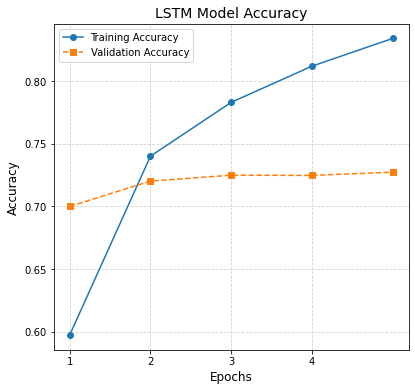

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# LSTM Model Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), lstm_history.history['accuracy'], marker='o', linestyle='-', label='Training Accuracy')
plt.plot(range(1, 6), lstm_history.history['val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
plt.title('LSTM Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(1, 5))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

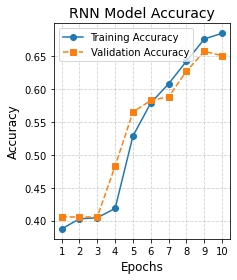

In [32]:
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), history.history['accuracy'], marker='o', linestyle='-', label='Training Accuracy')
plt.plot(range(1, 11), history.history['val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
plt.title('RNN Model Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
print(lstm_history.history['accuracy'])

[0.5973435044288635, 0.7400836944580078, 0.7830694913864136, 0.811954140663147, 0.8341066241264343]


In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
rnn_accuracy = history.history['accuracy'][-1]  # Last epoch accuracy
lstm_accuracy = lstm_history.history['accuracy'][-1]  # Last epoch accuracy

In [36]:
# Accuracy comparison bar chart
models = ['SVM', 'Random Forest', 'Naive Bayes', 'RNN', 'LSTM']
accuracies = [svm_accuracy, rf_accuracy, nb_accuracy, rnn_accuracy, lstm_accuracy]

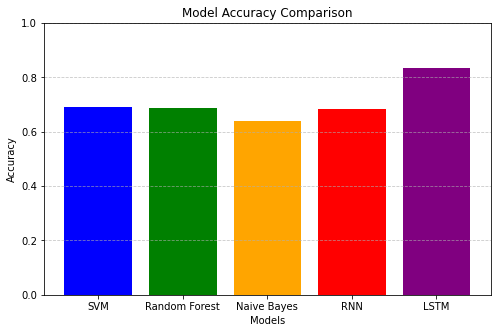

In [37]:
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [41]:
pip install Flask-Cors


In [42]:
import importlib.metadata
import flask_cors

print("Flask-CORS Version:", importlib.metadata.version("flask-cors"))


Flask-CORS Version: 5.0.1


In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [44]:
# Get predictions for RNN & LSTM
rnn_pred = np.argmax(rnn_model.predict(X_test_pad), axis=1)
lstm_pred = np.argmax(model.predict(X_test_pad), axis=1)

172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step


In [45]:
# Convert y_test from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

In [46]:
# Compute confusion matrices
rnn_cm = confusion_matrix(y_test_labels, rnn_pred)
lstm_cm = confusion_matrix(y_test_labels, lstm_pred)

In [47]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

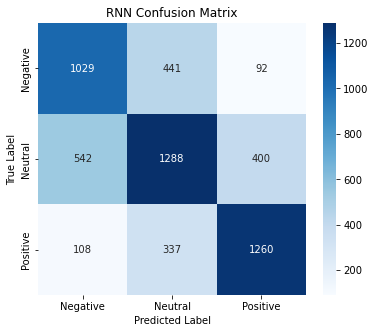

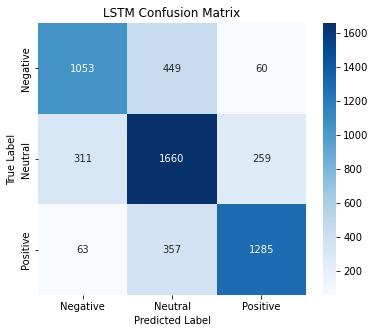

In [48]:
# Plot Confusion Matrices
plot_confusion_matrix(rnn_cm, "RNN Confusion Matrix")
plot_confusion_matrix(lstm_cm, "LSTM Confusion Matrix")

In [49]:
import importlib.metadata
import tensorflow as tf
import numpy as np
import pickle
import joblib
import os

In [50]:
print("Flask Version:", importlib.metadata.version("flask"))
print("TensorFlow Version:", tf.__version__)
print("NumPy Version:", np.__version__)
print("Pickle Version: Built-in (no specific version)")
print("Joblib Version:", joblib.__version__)
print("OS Module: Built-in (no specific version)")

Flask Version: 1.1.2
TensorFlow Version: 2.18.0
NumPy Version: 1.21.5
Pickle Version: Built-in (no specific version)
Joblib Version: 1.1.0
OS Module: Built-in (no specific version)


In [20]:
import joblib

In [21]:
# Save the tokenizer
joblib.dump(tokenizer, 'lstm_tokenizer.joblib')

['lstm_tokenizer.joblib']

In [53]:
print("SVM Classification Report:\n", classification_report(y_test_ML, svm_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test_ML, rf_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test_ML, nb_predictions))


SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.56      0.65      1562
     neutral       0.61      0.81      0.69      2230
    positive       0.80      0.66      0.72      1705

    accuracy                           0.69      5497
   macro avg       0.73      0.68      0.69      5497
weighted avg       0.71      0.69      0.69      5497

Random Forest Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.55      0.63      1562
     neutral       0.62      0.77      0.69      2230
    positive       0.76      0.70      0.73      1705

    accuracy                           0.69      5497
   macro avg       0.71      0.67      0.68      5497
weighted avg       0.70      0.69      0.69      5497

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.48      0.58      1562
     neutral       0.56    

In [54]:

from sklearn.metrics import classification_report

In [55]:
# Convert predictions to class labels if they are in one-hot format
rnn_pred_labels = np.argmax(rnn_model.predict(X_test_pad), axis=1)
lstm_pred_labels = np.argmax(model.predict(X_test_pad), axis=1)

172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


In [56]:
# Convert y_test from one-hot encoding to class labels
y_test_labels = np.argmax(y_test, axis=1)

In [57]:
# Generate classification reports
rnn_classification_report = classification_report(y_test_labels, rnn_pred_labels, target_names=['Negative', 'Neutral', 'Positive'])
lstm_classification_report = classification_report(y_test_labels, lstm_pred_labels, target_names=['Negative', 'Neutral', 'Positive'])

In [58]:
# Print classification reports
print("🔹 RNN Classification Report:\n", rnn_classification_report)
print("\n🔹 LSTM Classification Report:\n", lstm_classification_report)

🔹 RNN Classification Report:
               precision    recall  f1-score   support

    Negative       0.61      0.66      0.63      1562
     Neutral       0.62      0.58      0.60      2230
    Positive       0.72      0.74      0.73      1705

    accuracy                           0.65      5497
   macro avg       0.65      0.66      0.65      5497
weighted avg       0.65      0.65      0.65      5497


🔹 LSTM Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.67      0.70      1562
     Neutral       0.67      0.74      0.71      2230
    Positive       0.80      0.75      0.78      1705

    accuracy                           0.73      5497
   macro avg       0.74      0.72      0.73      5497
weighted avg       0.73      0.73      0.73      5497

